## Experimento para ver el efecto de una capa POOL 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [61]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
#agrego capa convolucional y maxpooling para aumentar la complejidad del modelo y obtener un mejor accuracy
model_a.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=4, padding='valid', activation='relu', input_shape=(28, 28, 1)))
#agrego capa convolucional para que los dos modelos tengan la misma cantidad de paramentros y cambio el stride de 2 a 4
model_b.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation='relu'))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [46]:
model_a.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               480300    
_________________________________________________________________
dense_25 (Dense)             (None, 100)              

In [62]:
model_b.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 7, 7, 32)          320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 5, 64)          18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 300)               480300    
_________________________________________________________________
dense_34 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 530,226
Trainable params: 530,226
Non-trainable params: 0
_______________________________________________

In [63]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [48]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 48s 56ms/step - loss: 1.0783 - accuracy: 0.6322 - val_loss: 0.8041 - val_accuracy: 0.6920
Epoch 2/3
860/860 [==============================] - 48s 56ms/step - loss: 0.6655 - accuracy: 0.7497 - val_loss: 0.6130 - val_accuracy: 0.7668
Epoch 3/3
860/860 [==============================] - 48s 56ms/step - loss: 0.5681 - accuracy: 0.7861 - val_loss: 0.5093 - val_accuracy: 0.8116


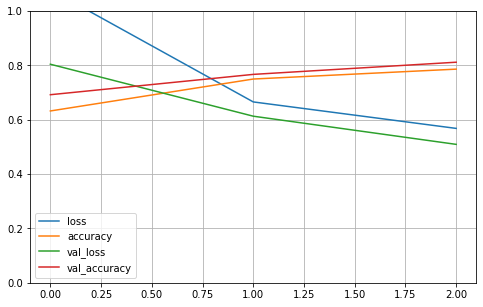

In [49]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.5463 - accuracy: 0.7943


In [51]:
X_new = X_test[:3]

In [52]:
y_pred = model_a.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [53]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


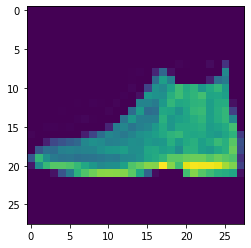

In [54]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [64]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 14s 17ms/step - loss: 1.1844 - accuracy: 0.6125 - val_loss: 0.7318 - val_accuracy: 0.7262
Epoch 2/3
860/860 [==============================] - 14s 16ms/step - loss: 0.6172 - accuracy: 0.7702 - val_loss: 0.6438 - val_accuracy: 0.7560
Epoch 3/3
860/860 [==============================] - 14s 16ms/step - loss: 0.5473 - accuracy: 0.8006 - val_loss: 0.5571 - val_accuracy: 0.7992


In [65]:
ev = model_b.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5923 - accuracy: 0.7839


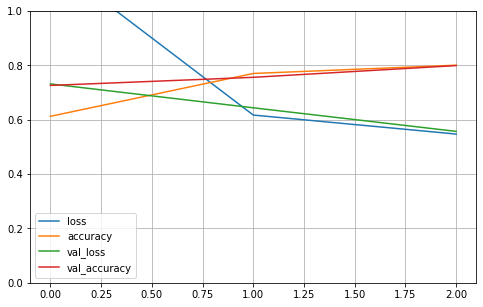

In [66]:

pd.DataFrame(model_history_b.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
X_new = X_test[:3]

In [59]:
y_pred = model_b.predict_classes(X_new)
y_pred

array([9, 2, 1])

AxesImage(54,36;334.8x217.44)


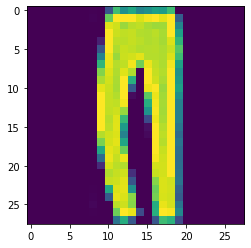

In [60]:
print(plt.imshow(X_test[2].reshape((28,28))))